In [1]:
import os
import time 
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np 
import pandas as pd
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
naive_data_200200 = {
    "algorithm": "2.1",
    "S": 5,
    "l": 0.2,
    "NZ": 200,
    "NE": 200,
    "muHat": [ 0.000525, 0.004225, 0.008875, 0.012275, 0.01215],
    "muCI0": [ 0.00030050726786140611202641226284982, 0.0035893315862373844499222386161819, 0.0079558528132435257090859792583615, 0.011195890689833263437202859336139, 0.011076331264208835389317719943847],
    "muCI1": [ 0.00074949273213859371467471248706715, 0.0048606684137626147285127231612023, 0.0097941471867564727088462106507905, 0.013354109310166735469227461408082, 0.013223668735791161560344519898536],
    "sigmaHat":  [0.02290714939570212549391214906791, 0.064863352953446848370155919383251, 0.093789414575217694425290915205551, 0.11011188623701924360620552079126, 0.10955673218444739180910119102919],
    "sigmaCI0": [ 0.022749512395221580668414063097771, 0.064416991678891644124149706840399, 0.093143996774204124156071316065209, 0.10935414431270476520730028369144, 0.10880281058793277171314883844389],
    "sigmaCI1": [ 0.023067001590489601831057697722827, 0.065315986720825544575852461548493, 0.094443902111344471550502532863902, 0.11088027633144448280688720842591,  0.1103212482659076815183496478312]
}

naive_data_300300 = {
    "algorithm": "2.1",
    "S": 5,
    "l": 0.2,
    "NZ": 300,
    "NE": 300,
    "muHat": [0.016011111111111111111111111111111, 0.0131, 0.016955555555555555555555555555556, 0.0058555555555555555555555555555556, 0.0053],
    "muCI0": [0.01519105999755277977558698410121, 0.012357139421670564408128889510863, 0.016112069944402521159965147035109, 0.0053570799752713314095808883052996, 0.0048256279597619433988087145337431],
    "muCI1": [ 0.016831162224669442978308708802615,  0.01384286057832943492296173815248, 0.017799041166708592931477994625311,   0.00635403113583977996459140058505,  0.005774372040238056648375764012826 ],
    "sigmaHat": [ 0.12551864597288087121995658890228, 0.11370370992357581307885538990377, 0.1291055765416090073127719506374, 0.07629765858902319564105454219316, 0.072608323058924104098643681481917 ],
    "sigmaCI0": [ 0.12494147259650589809609755320707,  0.1131808652605037629479411975808, 0.12851190935420597760696637124056, 0.075946818465820742360961048689205, 0.072274447636288499663415052509663 ],
    "sigmaCI1": [ 0.12610121384953845713461362265662, 0.11423144130838203125222207745537, 0.12970479238725118875663611106575, 0.076651777808631069155431703165959, 0.072945319018880891426270807187393 ]
}

naive_data_320320 = {
    "algorithm": "2.1",
    "S": 5,
    "l": 0.2,
    "NZ": 320,
    "NE": 320,
    # muHat is the MC estimate
    "muHat":[ 0.0099316406249999999306110609609277, 0.008486328124999999514277426726494, 0.00615234375, 0.01341796875, 0.00494140625],
    # confidence intervals for MC estimates
    "muCI0": [ 0.0093242774514969359311855612304498, 0.0079244855703264945739894287157767, 0.0056733988290626636424862638818922, 0.012713250764637886586205794969828, 0.0045119143534118983859815266157511],
    "muCI1": [  0.010539003798503063930036560691406, 0.0090481706796735027198419487604042, 0.0066312886709373360105690409227464, 0.014122686735362113830127839264605, 0.0053708981465881008507401439544537],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.099161984479221476629362541643786, 0.091729997992739717438404056792933, 0.078195601722879898298756984331703, 0.11505675183375864423229728572551, 0.07012158563677842182393362691073],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.098734382187814120901414582931466, 0.091334443612313756521992047510139, 0.077858409817632312499569025021628, 0.11456060877062429481654248775158, 0.069819210176536541934133595077583],
    "sigmaCI1": [ 0.099593332438415754781502187142905, 0.092129017310867158951914746012335, 0.078535747328055835470017598254344, 0.11555724096127718836246600631057, 0.070426609815335772246669421292609]
}
 

naive_data_400002 = {
    "algorithm": "2.1",
    "S": 5,
    "l": 0.2,
    "NZ": 40000,
    "NE": 2,
    # muHat is the MC estimate
    "muHat":[ 0.008775, 0.0089, 0.0094, 0.008875, 0.0090375],
    # confidence intervals for MC estimates
    "muCI0": [ 0.0081287179873950100861268452945296, 0.0082491721571254453954091800937931, 0.0087313090103072824033070276072976, 0.0082250786871764704905052312255975, 0.0083817094593572043920159941876591],
    "muCI1": [ 0.0094212820126049895419484414560429, 0.0095508278428745544547107115818108,  0.010068690989692718334991283768431, 0.0095249213128235261927034827067473, 0.0096932905406427963962423532962021],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.09326364833819769661893417378451, 0.09391964789782791811489914834965, 0.096497442437316574559424964263599, 0.093788828382139866057798371912213, 0.094635804761919697924987815440545],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.092808906457860079752819615350745, 0.093461707445714886643983732028573, 0.096026932981557441837416888574808, 0.093331525789617453270352598337922, 0.094174372418541443807704638402356],
    "sigmaCI1": [  0.09372289952161305670585988991661, 0.094382129370637349308204022690916, 0.096972617550295098221013745387609, 0.094250665670227135040093457973853, 0.095101812752222347757680154245463]
}

bernoulli_data_200200 = {
    "algorithm": "2.2",
    "S": 5,
    "l": 0.2,
    "NZ": 200,
    "NE": 200,
    # muHat is the MC estimate
    "muHat":[ 0.020125, 0.0119, 0.018475, 0.0097, 0.0087],
    # confidence intervals for MC estimates
    "muCI0": [ 0.018748773395203817415666236456673, 0.010837300206135481311919832592139, 0.017155286764075385053107680732865, 0.0087394810827128559943544061638931, 0.0077898796076046224190481126470331],
    "muCI1": [ 0.021501226604796183639045636937226, 0.012962699793864520397823625330602, 0.019794713235924611682836626869175,  0.010660518917287144582961566641188, 0.0096101203923953763819110207577978],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.14042961720000535219554649302154, 0.10843746569847802219133114931537, 0.13466301544295486425362184945698, 0.098010969558297064696539280248544, 0.092868324056945256161910151604388],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.13946324188845335423359017568146, 0.10769124640522859115421283604519, 0.13373632336689605937252167677798, 0.097336500859094426951756418020523, 0.092229244798714263287031656091131],
    "sigmaCI1": [ 0.14140957250281566137672939476033, 0.10919417124003902297424417611182,  0.1356027298615151699401337737072, 0.098694916230425630554456972731714, 0.093516383977902628465983525529737]
}
 
    
bernoulli_data_300300 = {
    "algorithm": "2.2",
    "S": 5,
    "l": 0.2,
    "NZ": 300,
    "NE": 300,
    # muHat is the MC estimate
    "muHat":[ 0.011855555555555555555555555555556, 0.0089555555555555555555555555555556, 0.0075555555555555555555555555555556, 0.0061, 0.0036222222222222222222222222222222],
    # confidence intervals for MC estimates
    "muCI0": [ 0.011148414159786387833683818371355, 0.0083400557478076516038090204574473, 0.0069898096834204422392322619828064, 0.0055912887376475105954964917032157, 0.0032297267496464456514038143808421],
    "muCI1": [ 0.012562696951324722055565175082847, 0.0095710553633034586851202618618117,  0.008121301427690668511827354336674,  0.006608711262352490178884067972831, 0.0040147176947979987607362239998565],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.10823646116786272974863436502346, 0.094209618385683646657469125784701, 0.086594182558956803164029736308294, 0.077864352338444173251552626879857, 0.060076133613704438274361052663153],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.10773875659771758872551572494558, 0.093776413556957163852878522902756,  0.08619599584865098029773378129903, 0.077506308075059274220741656336031,  0.05979988505629992706635889021527],
    "sigmaCI1": [ 0.10873881749007097141657141037285, 0.094646872125303566081200301596255, 0.086996090886387072993457536540518, 0.078225743031098138313694789758301, 0.060354964103994268587172200568602]
}


bernoulli_data_320320 = {
    "algorithm": "2.2",
    "S": 5,
    "l": 0.2,
    "NZ": 320,
    "NE": 320,
    # muHat is the MC estimate
    "muHat": [ 0.003515625, 0.00712890625, 0.0028222656250000001214306433183765, 0.011904296874999999514277426726494, 0.010751953124999999791833182882783],
    # confidence intervals for MC estimates
    "muCI0": [   0.00315309672427175127773502083528, 0.0066136025605516195538524648611656, 0.002497335037239672983488958379894, 0.011240008355954780525087777220961, 0.010120266547771258197618848839738],
    "muCI1": [ 0.0038781532757282488957373267624007, 0.0076442099394483792318411019550695, 0.003147196212760327259372328256859, 0.012568585394045218503467076232027, 0.011383639702228741386047516925828],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.059188677910288409189654146302928, 0.084131766107001168530921120236599, 0.053050239635826848538791011833382, 0.10845597936957349083364476882707, 0.10313317846652896025982926175857],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.058933446891741028683675551747001, 0.083768976514230972241215056328656, 0.052821478542075826767554502794155, 0.10798829988999454621012574762062, 0.10268845175332314001437339356926],
    "sigmaCI1": [ 0.059446144675985898575554244871455, 0.084497733627762805497241060947999, 0.053281004608128061661442842478209, 0.10892775558108411249058633529785, 0.10358180085231913358789768153656]
}


bernoulli_data_400002 = {
    "algorithm": "2.2",
    "S": 5,
    "l": 0.2,
    "NZ": 40000,
    "NE": 2,
    # muHat is the MC estimate
    "muHat": [ 0.0088625, 0.0090625, 0.00875, 0.0090875, 0.00815],
    # confidence intervals for MC estimates
    "muCI0": [ 0.0082130324440326477747342792667951, 0.0084058113285356284016813788184663,  0.008104631135325071622510506585968, 0.0084299144700210170561005540434962, 0.0075269625018612399541817481463113],
    "muCI1": [ 0.0095119675559673533965510117127451, 0.0097191886714643703493177184782326, 0.0093953688646749300428240303517669, 0.0097450855299789831270862450196546, 0.0087730374981387585636705139791047],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.093723347649209004517345533713524, 0.094765412201816542903110018869484, 0.093131873809789350593391077381966, 0.09489483603767218111713077632885, 0.089909279532182848071464320582891],
    # confidence intervals for MC estimates
    "sigmaCI0": [  0.09326636433254753555388560926076, 0.094303347908777576669159259381559, 0.092677774445564881089509867706511, 0.094432140690202837074451736043557,  0.08947089313445150127179772425734],
    "sigmaCI1": [ 0.094184862495437893237237858556909, 0.095232058408307521113478344432224, 0.093590476105785080918053608911578,   0.0953621195562438794812720743721, 0.090352013049055851512392223412462] 
}

glassermanli_data_200200 = {
    "algorithm": "glassermanli",
    "S": 5,
    "l": 0.2,
    "NZ": 200,
    "NE": 200,
    # muHat is the MC estimate
    "muHat": [ 0.011380027192228022586695246332056, 0.0015268271151032755672538598901156, 0.0093259599772378392462668372786538, 0.0034450210594660431347169282645382, 0.0012871542132996995067006906765528],
    # confidence intervals for MC estimates
    "muCI0": [ 0.010082489733185259067616001971146, 0.0014326044745291196397252164729252, 0.008175392443830324998299552419212, 0.0031363671840411886868049684551352, 0.0012435946427854414030045315797679],
    "muCI1": [ 0.012677564651270786105774490692966, 0.0016210497556774314947825033073059, 0.010476527510645351759510646161289, 0.0037536749348908975826288880739412, 0.0013307137838139576103968497733376],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.13240020796068563413427909836173, 0.0096144408931565471243541054491288, 0.11740345500957694024890543005313, 0.031494919094104879830897658621325, 0.004444801307717656004003803360547],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.13148908753773860813574003714166, 0.0095482785087623086445196562976889, 0.11659553569259573091443371595233, 0.031278184812129856962048535251597, 0.0044142141257956634542436447077307],
    "sigmaCI1": [  0.1333241319054434548263543547364, 0.0096815330246076084647066650745728, 0.11822272761459320933319361301983, 0.031714699035069134069875218528978, 0.0044758183160830107907846020509623]
}

glassermanli_data_300300 = {
    "algorithm": "glassermanli",
    "S": 5,
    "l": 0.2,
    "NZ": 300,
    "NE": 300,
    # muHat is the MC estimate
    "muHat": [ 0.0021733966880752627476303118214673, 0.0016497479334406266789775363790227, 0.0030006550584880547528909833232547, 0.0042658090892382476144728542521989, 0.0024225583773202848288097488449466],
    # confidence intervals for MC estimates
    "muCI0": [ 0.0020278080520525604800441410446865, 0.0015952155786828968279944529484737, 0.0028539106182501562322673116511851, 0.0039309412576776364689479237313208, 0.0022913205513710403066207632605256],
    "muCI1": [ 0.0023189853240979650152164825982481, 0.0017042802881983565299606198095717, 0.0031473994987259532735146549953242,  0.004600676920798858759997784773077, 0.0025537962032695293509987344293677],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.022284084687494640220073449654592, 0.008346830115506151046012028871246, 0.022460994367516560338282616271499, 0.051255532859382953170257479769134, 0.020087521303514467574391488824403],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.022181615605719445100119102676217, 0.0083084488209785173351562548305083, 0.022357711800569179255715468457311, 0.051019844139758463441580715880264, 0.019995152696413189680191280217514],
    "sigmaCI1": [ 0.022387511487545180138836187211382, 0.0083855701374329540825902640222012, 0.022565242255907020513250316184894,  0.05149342442293038113465541982805, 0.020180753225691440422284728128943]
}


glassermanli_data_320320 = {
    "algorithm": "glassermanli",
    "S": 5,
    "l": 0.2,
    "NZ": 320,
    "NE": 320,
    # muHat is the MC estimate
    "muHat": [ 0.0024634081899035952835375073988189, 0.0037216991483639038154618283726904, 0.0024714826775387383275828234729943, 0.0017017626310508310576857793350314, 0.020041599971234370924921819323572],
    # confidence intervals for MC estimates
    "muCI0": [ 0.0023826291268582719742874509449848, 0.0035332075667985508166113461925306, 0.0023993902276819713097200104101603,   0.00160403122915169036449833939173, 0.017955748773156473413470379796308],
    "muCI1": [  0.002544187252948918592787563852653, 0.0039101907299292568143123105528502, 0.0025435751273955053454456365358283, 0.0017994940329499717508732192783327, 0.022127451169312268436373258850836],
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": [ 0.013188504910079147658397147324649, 0.030774337498671446716747013283566, 0.011770273051844318268344125044678, 0.015956251845760348329061883987379, 0.34054936675992319994321633203072],
    # confidence intervals for MC estimates
    "sigmaCI0": [ 0.013131633973606829032809706347962, 0.030641633647492141218071637354115, 0.011719517757324033821464404070412, 0.015887445943101659306950779182444, 0.33908086357971123359078546855017],
    "sigmaCI1": [ 0.013245874018893002976859918362607, 0.030908203795774337463431180594853, 0.011821472947517404350481484698321, 0.016025660467483732879445668118024, 0.34203073358742525078568519347755] 
}


"""
data_template = {
    "algorithm": "2.2",
    "S": 5,
    "l": 0.2,
    "NZ": 300,
    "NE": 300,
    # muHat is the MC estimate
    "muHat": ,
    # confidence intervals for MC estimates
    "muCI0": ,
    "muCI1": ,
    # sigmaHat^2 is the variance of MC estimate
    "sigmaHat": ,
    # confidence intervals for MC estimates
    "sigmaCI0": ,
    "sigmaCI1": 
}
"""

dfs = map(lambda x: pd.DataFrame(x), [
    naive_data_200200,
    naive_data_300300,
    naive_data_320320,
    naive_data_400002,
    bernoulli_data_200200,
    bernoulli_data_300300,
    bernoulli_data_320320,
    bernoulli_data_400002,
    glassermanli_data_200200,
    glassermanli_data_300300,
    glassermanli_data_320320,
])

df = pd.concat(dfs)

# hack for now: stddev -> var
df.loc[:,["sigmaHat", "sigmaCI0", "sigmaCI1"]] = df.loc[:,["sigmaHat", "sigmaCI0", "sigmaCI1"]] **2
# TODO: to log scale here
df

,NE,NZ,S,algorithm,l,muCI0,muCI1,muHat,sigmaCI0,sigmaCI1,sigmaHat
0,200,200,5,2.1,0.2,0.000301,0.000749,0.000525,0.000518,0.000532,0.000525
1,200,200,5,2.1,0.2,0.003589,0.004861,0.004225,0.004150,0.004266,0.004207
2,200,200,5,2.1,0.2,0.007956,0.009794,0.008875,0.008676,0.008920,0.008796
3,200,200,5,2.1,0.2,0.011196,0.013354,0.012275,0.011958,0.012294,0.012125
4,200,200,5,2.1,0.2,0.011076,0.013224,0.012150,0.011838,0.012171,0.012003
0,300,300,5,2.1,0.2,0.015191,0.016831,0.016011,0.015610,0.015902,0.015755
1,300,300,5,2.1,0.2,0.012357,0.013843,0.013100,0.012810,0.013049,0.012929
2,300,300,5,2.1,0.2,0.016112,0.017799,0.016956,0.016515,0.016823,0.016668
3,300,300,5,2.1,0.2,0.005357,0.006354,0.005856,0.005768,0.005875,0.005821
4,300,300,5,2.1,0.2,0.004826,0.005774,0.005300,0.005224,0.005321,0.005272


In [3]:
show_log_scale = False
show_NRun_CI = False
# the gold standard estimator
# (NZ, NE) = (1000, 10000)
bernoulli_overnight = {
    "muHat": 0.0086053,
    "sigmaHat": 0.07264915664941935079140065088676,
    "muCI0": 0.004097079422,
    "muCI1":  0.01311352058,
    "sigmaCI0": 0.069598789223672154152100560846431,
    "sigmaCI1": 0.075981236183767535161490983828342
}

# for now stddev -> var
bernoulli_overnight["sigmaHat"] = bernoulli_overnight["sigmaHat"] **2 
bernoulli_overnight["sigmaCI0"] = bernoulli_overnight["sigmaCI0"] **2 
bernoulli_overnight["sigmaCI1"] = bernoulli_overnight["sigmaCI1"] **2 

if show_log_scale:
    bernoulli_overnight = {k: math.log(v) for k, v in bernoulli_overnight.iteritems()}

bernoulli_overnight

{'muCI0': 0.004097079422,
 'muCI1': 0.01311352058,
 'muHat': 0.0086053,
 'sigmaCI0': 0.004843991461401144,
 'sigmaCI1': 0.005773148252013465,
 'sigmaHat': 0.005277899961871871}

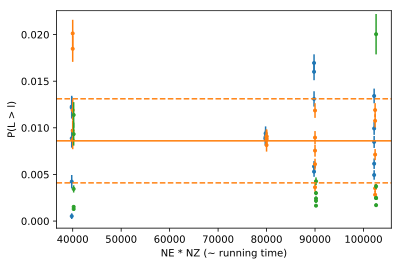

In [4]:
# plot the MC estimates
colors = {
    "2.1": "C0",         # blue:   naive
    "2.2": "C1",         # orange: bernoulli
    "glassermanli": "C2" # glassermanli
}

fig, ax = plt.subplots(1, 1)

# offet to distinguish lines with same xval
offset = 200

for key, group in df.groupby(["NE", "NZ", "algorithm"]):
    ne, nz, algo = key
    # compute x 
    if algo == "2.1":
        xval = ne*nz-offset
    elif algo == "2.2":
        xval = ne*nz
    else:
        xval = ne*nz+offset

    # xaxis by sample size
    xs = [xval for _ in range(len(group))]
    # yaxis are values of MC estimate
    ys = group["muHat"]
    # transformed to log scale
    if show_log_scale:
        ys = group["muHat"].apply(lambda x: math.log(x))
    # plot the MC estimate
    plt.plot(xs, ys, ".", color=colors[algo])
    
    # plot the CI for each MC estimate
    def extract_ci(row):
        lower, upper = row["muCI0"], row["muCI1"]
        if show_log_scale is True:
            lower, upper = math.log(lower), math.log(upper)
        return lower, upper
    cis = list(group.apply(extract_ci, axis=1))
    for ci in cis:
        l = mlines.Line2D([xval, xval], [ci[0], ci[1]], color=colors[algo])
        ax.add_line(l)
        
    # compute CI for MC estimate where N=NRuns
    if show_NRun_CI:
        result = stats.describe(ys)
        lower, upper = stats.norm.interval(0.95, loc=result.mean, scale=math.sqrt(result.variance))
        l = mlines.Line2D([xval, xval], [lower, upper], color="g")
        ax.add_line(l)

# horizontal line is 
# MC estimate and CI when running algorithm 2.2 on (NZ, NE) = (1000, 10000)
plt.axhline(y=bernoulli_overnight["muHat"], linestyle="-", color="C1")
plt.axhline(y=bernoulli_overnight["muCI0"], linestyle="--", color="C1")
plt.axhline(y=bernoulli_overnight["muCI1"], linestyle="--", color="C1")

plt.ylabel("P(L > l)")
plt.xlabel("NE * NZ (~ running time)")

if show_log_scale:
    plt.yticks(np.linspace(0, -20, 10))
    plt.ylabel("log(P(L > l))")
    
plt.rcParams["figure.figsize"] = [10,10]
plt.show()

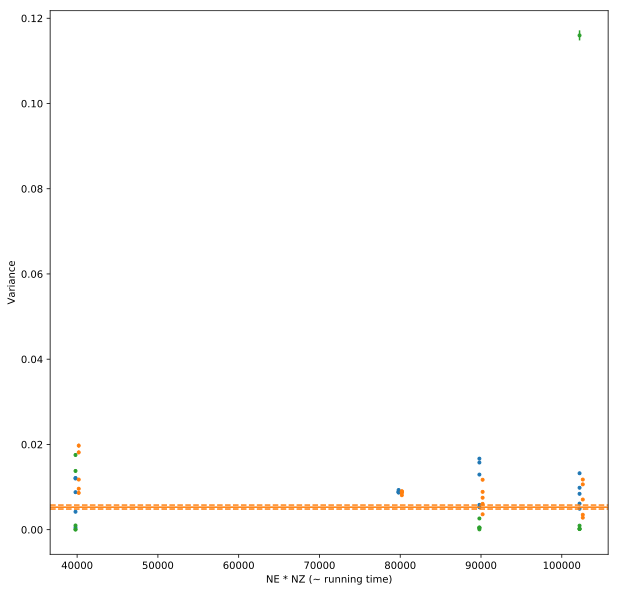

In [5]:
# plot the change in variance 
# should expect approx the same ... since they are said to be equivalent

fig, ax = plt.subplots(1, 1)

# offet to distinguish lines with same xval
offset = 200

for key, group in df.groupby(["NE", "NZ", "algorithm"]):
    ne, nz, algo = key
    # compute x 
    xval = ne*nz+offset if algo == "2.2" else ne*nz-offset
    # xaxis by sample size
    xs = [xval for _ in range(len(group))]
    # yaxis are values of MC estimate
    ys = group["sigmaHat"]
    # transformed to log scale
    if show_log_scale:
        ys = group["sigmaHat"].apply(lambda x: math.log(x))
    # plot the MC estimate
    plt.plot(xs, ys, ".", color=colors[algo])
    
    # plot the CI for each MC estimate
    def extract_ci(row):
        lower, upper = row["sigmaCI0"], row["sigmaCI1"]
        if show_log_scale is True:
            lower, upper = math.log(lower), math.log(upper)
        return lower, upper
    cis = list(group.apply(extract_ci, axis=1))
    for ci in cis:
        l = mlines.Line2D([xval, xval], [ci[0], ci[1]], color=colors[algo])
        ax.add_line(l)
    
    
plt.axhline(y=bernoulli_overnight["sigmaHat"], linestyle="-", color="C1")
plt.axhline(y=bernoulli_overnight["sigmaCI0"], linestyle="--", color="C1")
plt.axhline(y=bernoulli_overnight["sigmaCI1"], linestyle="--", color="C1")

plt.ylabel("Variance")
plt.xlabel("NE * NZ (~ running time)")

if show_log_scale:
    plt.yticks(np.linspace(0, -20, 10))
    plt.ylabel("log(Variance)")

plt.show()